Playground to develop Game of Life
==========
Routine to develop an object to generate game of life and put it into an animation

Individual function development
-----

In [141]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline
import itertools as it
from matplotlib import animation

In [34]:
move = np.array([-1,0,1])
move = set(it.product(move, move))

In [35]:
nullset = set([(0,0)])
move = move.difference(nullset)

In [36]:
move

{(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)}

In [133]:
N=50
allmove = dict(move_corner00=set([(0,1), (1,0), (1,1)]), move_cornerNN=set([(-1,0), (0,-1), (-1,-1)]), move_corner0N=set([(0,-1), (1,0), (1,-1)]),
               move_cornerN0=set([(-1,0), (0,1), (-1,1)]), move_edgetop=set([(-1,0), (1,0), (-1,-1), (1,-1), (0,-1)]),
               move_edgebottom=set([(-1,0), (1,0), (-1,1), (1,1), (0,1)]), move_edgeleft=set([(0,1), (0,-1), (1,1),(1,-1),(1,0)]), 
               move_edgeright=set([(0,1), (0,-1), (-1,1), (-1,1), (-1,0)]), move=move)


In [77]:
board = sps.randint.rvs(size=(N,N), low=0, high=2)
boardx, boardy = zip(*[[i,j] for i,e1 in enumerate(board) for j,e2 in enumerate(e1) if e2 == 1])

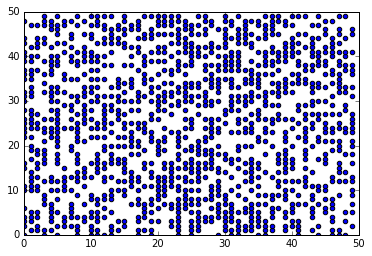

In [88]:
plt.xlim(0,N)
plt.ylim(0,N)
plt.scatter(boardx, boardy)

In [130]:
def checkpos(s, N):
    """
        check position to see if it is an edge, corner or interior of the board. 
        s: position to be checked as a tuple
        N: size of the board
    """
    if s == (0,0):
        return "move_corner00"
    elif s == (0,N-1):
        return "move_corner0N"
    elif s == (N-1,0):
        return "move_cornerN0"
    elif s == (N-1,N-1):
        return "move_cornerNN"
    elif s[0] == 0: 
        return "move_edgeleft"
    elif s[0] == N-1:
        return "move_edgeright"
    elif s[1] == 0:
        return "move_edgebottom"
    elif s[1] == N-1:
        return "move_edgetop"
    else:
        return "move"

In [121]:
def liveordie(s):
    """
    Check if a given position s should live or die. 
    """
    place_to_check = allmove[checkpos(s,N)]
    coord = [tuple(np.array(s)+np.array(i)) for i in place_to_check]
    check = sum([1 for i in coord if board[i[0],i[1]] == 1 ])
    if (check <2) or (check >4):
        return 0
    else:
        return 1
    return check

In [111]:
liveordie((1,2),N)

0

In [122]:
def born(s):
    """
    Check and see if an empty cell should be occupied. 
    """
    place_to_check = allmove[checkpos(s,N)]
    coord = [tuple(np.array(s)+np.array(i)) for i in place_to_check]
    check = sum([1 for i in coord if board[i[0],i[1]] == 1 ])
    if check == 3:
        return 1
    else:
        return 0
    return check

In [118]:
def get_status():
    deathcells = [(i,j) for i,e1 in enumerate(board) for j,e2 in enumerate(e1) if board[i,j] == 0 ]
    livecells = [(i,j) for i,e1 in enumerate(board) for j,e2 in enumerate(e1) if board[i,j] == 1 ]
    return deathcells, livecells

In [119]:
dc, lc = get_status()

In [128]:
def next_gen(board):
    dc, lc = get_status()
    new_lc = list(map(liveordie, lc))
    new_dc = list(map(born, dc))
    newboard = np.zeros((N,N))
    for i, e1 in enumerate(lc):
        newboard[e1[0], e1[1]] = new_lc[i]
    for i, e1 in enumerate(dc):
        newboard[e1[0], e1[1]] = new_dc[i]
    return newboard

In [134]:
newboard = next_gen(board)

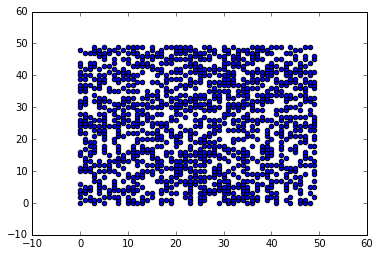

In [136]:
boardx, boardy = zip(*[[i,j] for i,e1 in enumerate(board) for j,e2 in enumerate(e1) if e2 == 1])
newboardx, newboardy = zip(*[[i,j] for i,e1 in enumerate(newboard) for j,e2 in enumerate(e1) if e2 == 1])
plt.scatter(boardx, boardy)

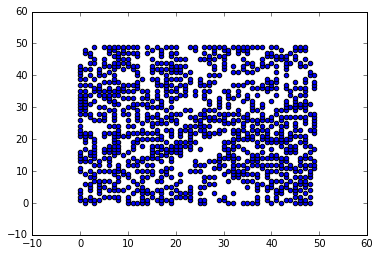

In [137]:
plt.scatter(newboardx, newboardy)

Putting the lose function above into a class
------------

In [143]:
class gameoflive(object): 
    """
    Implementing Conway's game of life as an animation. 
    """
    
    def __init__(self, N):
        """
        Initiate the board and other information. 
        """
        self.N = N
        move = np.array([-1,0,1])
        move = set(it.product(move, move))
        nullset = set([(0,0)])
        move = move.difference(nullset)
        self.allmove = dict(move_corner00=set([(0,1), (1,0), (1,1)]), move_cornerNN=set([(-1,0), (0,-1), (-1,-1)]), move_corner0N=set([(0,-1), (1,0), (1,-1)]),
               move_cornerN0=set([(-1,0), (0,1), (-1,1)]), move_edgetop=set([(-1,0), (1,0), (-1,-1), (1,-1), (0,-1)]),
               move_edgebottom=set([(-1,0), (1,0), (-1,1), (1,1), (0,1)]), move_edgeleft=set([(0,1), (0,-1), (1,1),(1,-1),(1,0)]), 
               move_edgeright=set([(0,1), (0,-1), (-1,1), (-1,1), (-1,0)]), move=move)
        if board is not None:
            self.board = board
        else:
            self.board = sps.randint.rvs(size=(N,N), low=0, high=2)     
        self.get_status()

    def checkpos(self, s):
        """
        check position to see if it is an edge, corner or interior of the board. 
        s: position to be checked as a tuple
        N: size of the board
        """
        if s == (0,0):
            return "move_corner00"
        elif s == (0,self.N-1):
            return "move_corner0N"
        elif s == (self.N-1,0):
            return "move_cornerN0"
        elif s == (self.N-1,self.N-1):
            return "move_cornerNN"
        elif s[0] == 0: 
            return "move_edgeleft"
        elif s[0] == self.N-1:
            return "move_edgeright"
        elif s[1] == 0:
            return "move_edgebottom"
        elif s[1] == self.N-1:
            return "move_edgetop"
        else:
            return "move"
    
    def liveordie(self, s):
        """
        Check if a given position s should live or die. 
        """
        place_to_check = self.allmove[self.checkpos(s,N)]
        coord = [tuple(np.array(s)+np.array(i)) for i in place_to_check]
        check = sum([1 for i in coord if self.board[i[0],i[1]] == 1 ])
        if (check <2) or (check >4):
            return 0
        else:
            return 1
        return check
    
    def born(self, s):
        """
        Check and see if an empty cell should be occupied. 
        """
        place_to_check = self.allmove[checkpos(s,self.N)]
        coord = [tuple(np.array(s)+np.array(i)) for i in place_to_check]
        check = sum([1 for i in coord if self.board[i[0],i[1]] == 1 ])
        if check == 3:
            return 1
        else:
            return 0
        return check
    
    def get_status(self):
        self.deathcells = [(i,j) for i,e1 in enumerate(self.board) for j,e2 in enumerate(e1) if self.board[i,j] == 0 ]
        self.livecells = [(i,j) for i,e1 in enumerate(self.board) for j,e2 in enumerate(e1) if self.board[i,j] == 1 ]
        return 0
    
    def next_gen(self):
        new_lc = list(map(liveordie, self.livecells))
        new_dc = list(map(born, self.deathcells))
        for i, e1 in enumerate(self.livecells):
            self.board[e1[0], e1[1]] = new_lc[i]
        for i, e1 in enumerate(self.deathcells):
            self.board[e1[0], e1[1]] = new_dc[i]
        self.get_status()
        return 0
    
    def draw_board(self):
        plt.clf()
        plt.xlim(0, self.N)
        plt.ylim(0, self.N)
        temp = [list(i) for i in self.livecells]
        boardx, boardy = zip(*temp)
        plt.scatter(boardx, boardy)

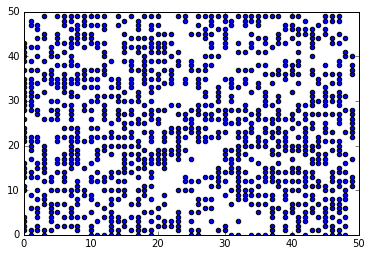

In [145]:
g1 = gameoflive(50)
g1.draw_board()

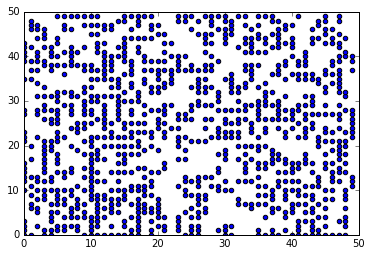

In [146]:
g1.next_gen()
g1.draw_board()

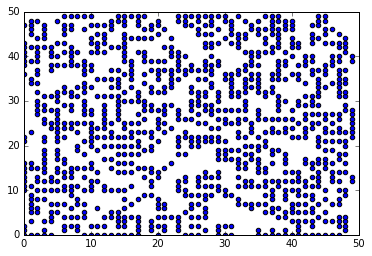

In [147]:
g1.next_gen()
g1.draw_board()